# <center> Практика. Статистические тесты в контексте EDA

## Постановка задачи

Оригинальный датасет: “Data Science Job Salaries” (kaggle.com)

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

### В процессе своего анализа вы должны:

Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:
* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
* Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
* Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
*Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

### Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:
* тесты для количественного признака:
* для одной выборки;
* для двух выборок;
* для нескольких выборок;
* тест для категориальных признаков.


## Наименование столбца	Описание

*work_year*	— Год, в котором была выплачена зарплата;

*experience_level* — Опыт работы на этой должности в течение года со следующими возможными значениями:
* *EN* — Entry-level/Junior;
* *MI* — Mid-level/Intermediate;
* *SE* — Senior-level/Expert;
* *EX* — Executive-level/Director.
 *employment_type* —	Тип трудоустройства для этой роли:
* *PT* — неполный рабочий день;
* *FT* — полный рабочий день;
* *CT* — контракт;
* *FL* — фриланс.

 *job_title* —	Роль, в которой соискатель работал в течение года;

 *salary* —	Общая выплаченная валовая сумма заработной платы;

 *salary_currency* —	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;

 *salary_in_usd* —	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata foorilla.com);

 *employee_residence* —	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

* *remote_ratio* —	Общий объём работы, выполняемой удалённо. Возможные значения:
* 0 — удалённой работы нет (менее 20 %);
* 50 — частично удалённая работа;
* 100 — полностью удалённая работа (более 80 %).

 *company_location* —	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
 
 *company_size* — Среднее количество людей, работавших в компании в течение года:
* *S* — менее 50 сотрудников (небольшая компания);
* *M* — от 50 до 250 сотрудников (средняя компания);
* *L* — более 250 сотрудников (крупная компания).

*Источник датасета*: ["Medical Cost Personal Datasets" (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [5]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


Данные были скопированы в Google Drive, они доступны по [ссылке](https://drive.google.com/file/d/1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r/view).

Для скачивания данных используйте команду `!wget`.

Данные появятся в локальной директории.

In [6]:
# скачиваем датасет 

# в ссылке указан id файла на Google Drive "1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r", id файла взят из ссылки на файл https://drive.google.com/file/d/1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r/view
!wget "https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries" -O insurance.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [7]:
# загружаем датасет
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/ds_salaries.csv', sep = ',')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений).

Проверим данные на наличие полных дубликатов:

In [10]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

### Анализ нормальности распределения:
1 - MinMaxScaler 
2 - Robustsscaler



0      0.002171
1      0.008422
2      0.002665
3      0.000526
4      0.004803
         ...   
602    0.004935
603    0.004014
604    0.004112
605    0.004803
606    0.006448
Name: salary_scaled, Length: 607, dtype: float64


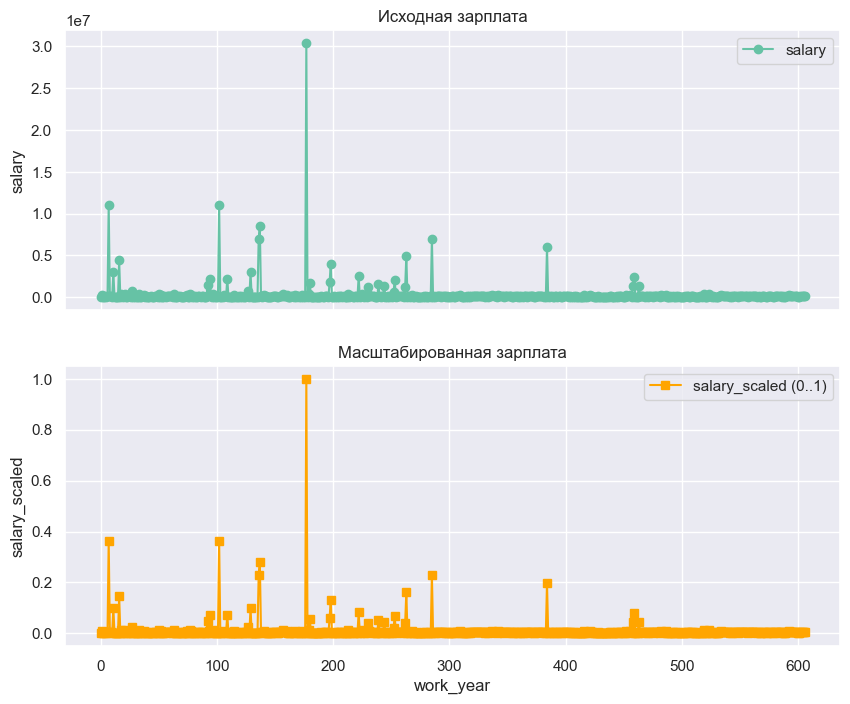

In [11]:
# Нормализация с помощью MinMaxScaler как учебная практика 
scaler = MinMaxScaler(feature_range=(0, 1))
data['salary_scaled'] = scaler.fit_transform(data[['salary']])
print(data['salary_scaled'])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

# Верхний график — исходные значения
axes[0].plot(data.index, data['salary'], marker='o', label='salary')
axes[0].set_title('Исходная зарплата')
axes[0].set_ylabel('salary')
axes[0].grid(True)
axes[0].legend()

# Нижний график — масштабированные значения (0..1)
axes[1].plot(data.index, data['salary_scaled'], marker='s', color='orange', label='salary_scaled (0..1)')
axes[1].set_title('Масштабированная зарплата')
axes[1].set_ylabel('salary_scaled')
axes[1].set_xlabel('work_year')
axes[1].grid(True)
axes[1].legend()



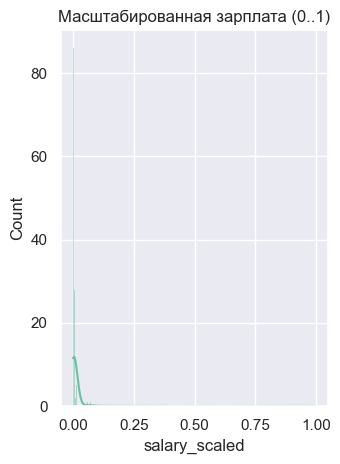

In [12]:
plt.subplot(1,2,2)
sns.histplot(data['salary_scaled'], kde=True)
plt.title('Масштабированная зарплата (0..1)')

plt.tight_layout()
plt.show()

0      0.002171
1      0.008422
2      0.002665
3      0.000526
4      0.004803
         ...   
602    0.004935
603    0.004014
604    0.004112
605    0.004803
606    0.006448
Name: salary_scaled, Length: 607, dtype: float64


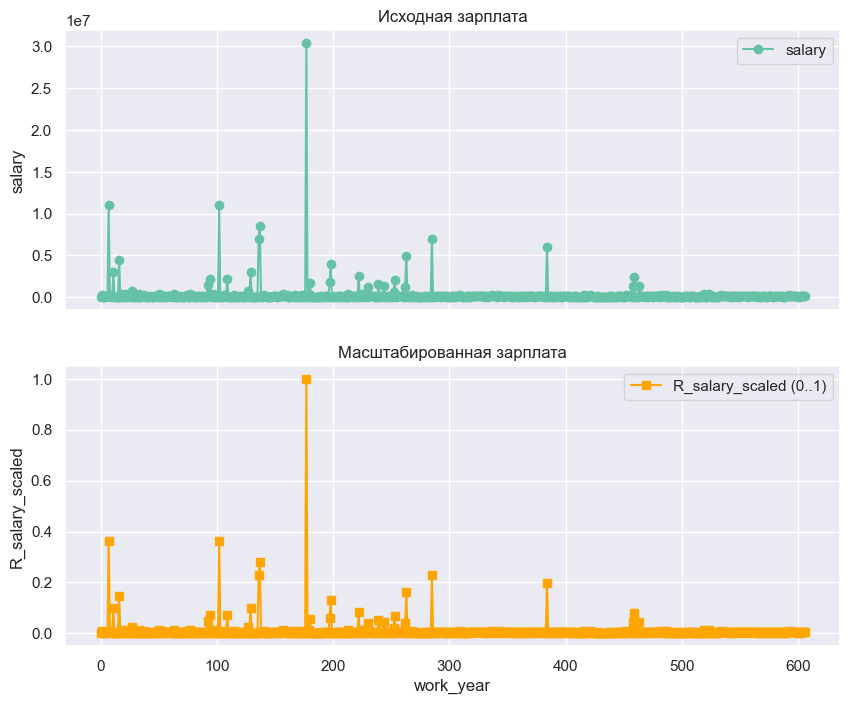

In [13]:

# Нормализация с помощью RobustScaler как учебная практика 
R_scaler = preprocessing.RobustScaler()
data['R_salary_scaled'] = scaler.fit_transform(data[['salary']])
print(data['salary_scaled'])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

# Верхний график — исходные значения
axes[0].plot(data.index, data['salary'], marker='o', label='salary')
axes[0].set_title('Исходная зарплата')
axes[0].set_ylabel('salary')
axes[0].grid(True)
axes[0].legend()

# Нижний график — масштабированные значения (0..1)
axes[1].plot(data.index, data['R_salary_scaled'], marker='s', color='orange', label='R_salary_scaled (0..1)')
axes[1].set_title('Масштабированная зарплата')
axes[1].set_ylabel('R_salary_scaled')
axes[1].set_xlabel('work_year')
axes[1].grid(True)
axes[1].legend()

Отобразил два графика, но при выборе данных, так как у нас в данных есть выбросы предпочтительней - RobustScaler. Он использует медийную и IQR константу, что делает его более подходящим в анализе данных. StandardScaler (x' = (x − mean)/std) — хорош для симметричных распределений без сильных выбросов. Нам он не подходит.

In [14]:
alpha = 0.05 
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Линейная закономерность роста

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП Data Scientist в 2022 ($μ_1$) статистически меньше либо равен размеру ЗП 2020 ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер ЗП Data Scientist в 2022 ($μ_1$) статистически больше, чем ЗП 2020  ($μ_2$).

$$ H_1 : μ_1 > μ_2$$


In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Чистка данных от выбросов методом IQR
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Добавляем столбец, помечающий выбросы
data['is_outlier'] = ~((data['salary'] >= lower_bound) & (data['salary'] <= upper_bound))

# Формируем чистый DataFrame без выбросов
df_cleaned_iqr = data[~data['is_outlier']]

# Отбираем строки с профессией "Data Scientist"
filtered_df = df_cleaned_iqr[df_cleaned_iqr['job_title'] == 'Data Scientist']

# Агрегирование средних зарплат
aggregated_data = filtered_df.groupby('job_title')['salary'].mean().reset_index()

# Вывод агрегированных данных
print(aggregated_data)

# Параметры для статистической проверки
population_mean = 0.27  # Глобальное среднее, заданное вами
sample_salary = filtered_df['salary']  # Выборка зарплат Data Scientists

# Проводим одновыборочный t-тест
t_statistic, p_value = stats.ttest_1samp(sample_salary, population_mean)

# Значимый уровень альфа
alpha = 0.05

# Анализируем результаты теста
print(f"t-статистика: {t_statistic:.4f}, p-значение: {p_value:.4f}")

if p_value < alpha:
    print("Нулевая гипотеза отвергается. Среднее значение выборки значительно отличается от глобального среднего.")
else:
    print("Нулевая гипотеза принимается. Нет значительных различий между средним значением выборки и глобальным средним.")

        job_title         salary
0  Data Scientist  113829.389313
t-статистика: 23.1297, p-значение: 0.0000
Нулевая гипотеза отвергается. Среднее значение выборки значительно отличается от глобального среднего.


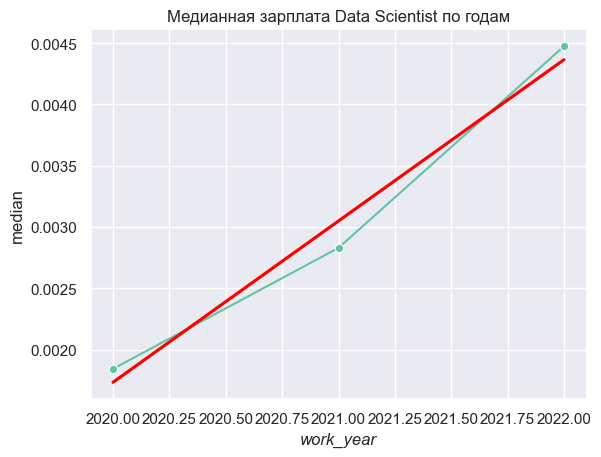

In [16]:
df = data[data['job_title']=='Data Scientist']
agg = df.groupby('work_year')['R_salary_scaled'].agg(['count','median','mean','std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()
agg.columns = ['work_year','count','median','mean','std','q1','q3']

import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=agg, x='work_year', y=agg['median'], marker='o')
plt.xlabel("workyear", fontsize=12, fontstyle='italic')
sns.regplot(data=agg, x='work_year', y='median', ci=None, scatter=False, line_kws={'color':'red'})
plt.title('Медианная зарплата Data Scientist по годам')
plt.show()



На графике видно: рост на всем протяжении времени, свидетельствующее о постоянном росте ЗП  

Распределение зарплат для профессии Data Scientist

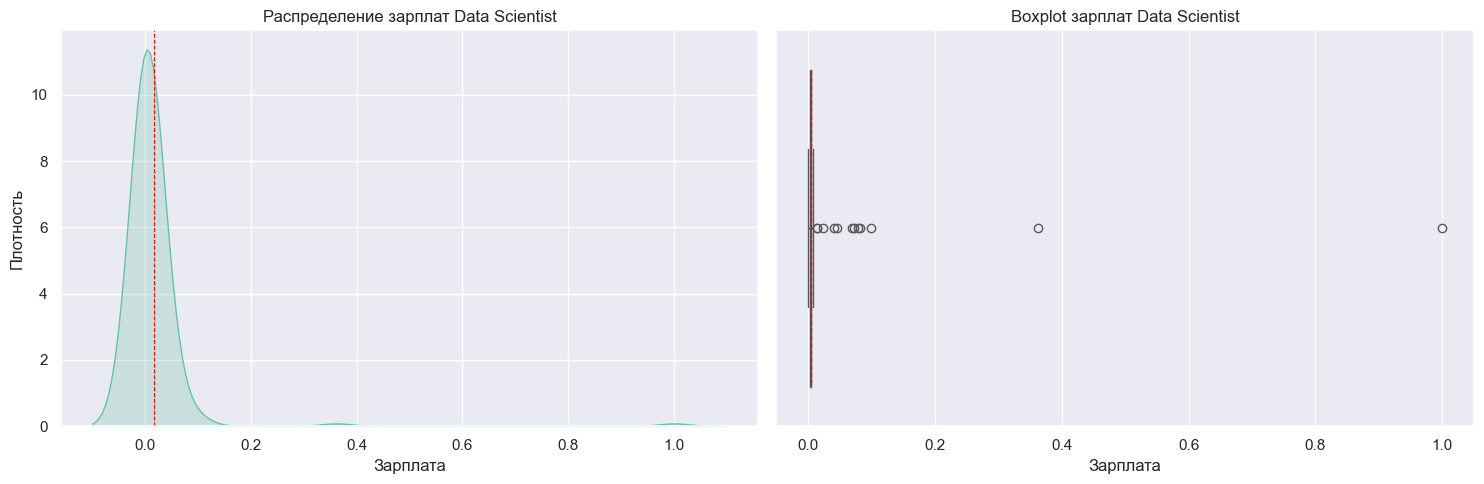

In [17]:
mask = data.loc[data['job_title'] == 'Data Scientist', 'R_salary_scaled']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Левый график — KDE распределение зарплат
sns.kdeplot(mask.dropna(), ax=axes[0], fill=True)
axes[0].set(xlabel='Зарплата', ylabel='Плотность')
axes[0].set_title('Распределение зарплат Data Scientist')
axes[0].axvline(mask.mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(x=mask.dropna(), ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Зарплата')
axes[1].set_title('Boxplot зарплат Data Scientist')

plt.tight_layout()
plt.show()

Видно, что график смещен к левой стороны от медианного значения. Плотность свидетельствует распределению ЗП, в данном случае у людей с левой строноы графика ЗП меньше средней по предоставленным данным.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП Data Scientist ($μ_1$) статистически равен ЗП Data Engineer ($μ_2$).

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): ЗП Data Scientist ($μ_1$) статистически не равен ЗП Data Engineer ($μ_2$).

$$ H_1 : μ_1 != μ_2$$

**Выберем подходящий статистический тест**
* Какой тип у признака? — Количесвтенный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.


In [18]:
from scipy.stats import kendalltau

# Извлечь зарплаты для каждой группы
ds_salary = data[data['job_title'] == 'Data Scientist']['salary']
de_salary = data[data['job_title'] == 'Data Engineer']['salary']

# Определить минимальное количество записей
min_length = min(len(ds_salary), len(de_salary))

# Обрезать выборки до равной длины
ds_salary_trimmed = ds_salary[:min_length]
de_salary_trimmed = de_salary[:min_length]

# Рассчитать коэффициент Кендалла
corr, _ = kendalltau(ds_salary_trimmed, de_salary_trimmed)

# Вывод результата
print(f"Коэффициент корреляции Кендалла: {corr:.4f}")
print(decision_normality(corr))
print(decision_hypothesis(corr))

Коэффициент корреляции Кендалла: 0.0167
p-value = 0.017
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
None
p-value = 0.017
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
None


In [19]:
from scipy.stats import levene

# Тест Левене
statistic, p_value = levene(ds_salary_trimmed, de_salary_trimmed)

# Вывод результатов
print(f"Статистика теста Левене: {statistic:.4f}")
print(f"P-значение: {p_value:.4f}")

Статистика теста Левене: 2.0724
P-значение: 0.1512


In [20]:
from scipy.stats import ttest_rel

# Парный t-тест
t_statistic, p_value = ttest_rel(ds_salary_trimmed, de_salary_trimmed)

# Вывод результатов
print(f"Статистика t: {t_statistic:.4f}")
print(f"P-значение: {p_value:.4f}")

Статистика t: 1.4322
P-значение: 0.1545


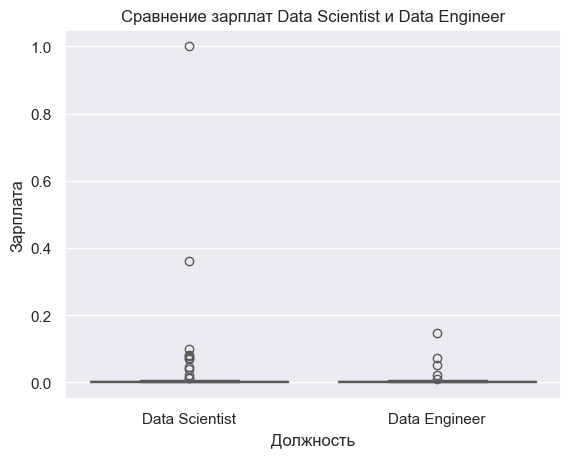

In [21]:


filtered_data = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

# Создаем график box-plot для визуализации распределения зарплат
sns.boxplot(x="job_title", y="R_salary_scaled", data=filtered_data)

# Добавляем подписи к осям и название графика
plt.xlabel("Должность")
plt.ylabel("Зарплата")
plt.title("Сравнение зарплат Data Scientist и Data Engineer")

# Отображаем график
plt.show()

Табличная визуализация

In [22]:
# Фильтрация данных
filtered_data = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

# Расчёт статистики
stats_table = filtered_data.groupby('job_title').agg(
    mean_salary=('salary', 'mean'),
    median_salary=('salary', 'median'),
    min_salary=('salary', 'min'),
    max_salary=('salary', 'max'),
    std_dev=('salary', 'std')
).reset_index()

# Вывод таблицы
print(stats_table)


        job_title    mean_salary  median_salary  min_salary  max_salary  \
0   Data Engineer  179210.553030       110000.0        4000     4450000   
1  Data Scientist  508347.202797       120160.0        4000    30400000   

        std_dev  
0  4.439865e+05  
1  2.712692e+06  


c:\Users\Admin\Desktop\VS Studio\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12256\1312858143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_Salary'] = np.log(filtered_data['R_salary_scaled'])


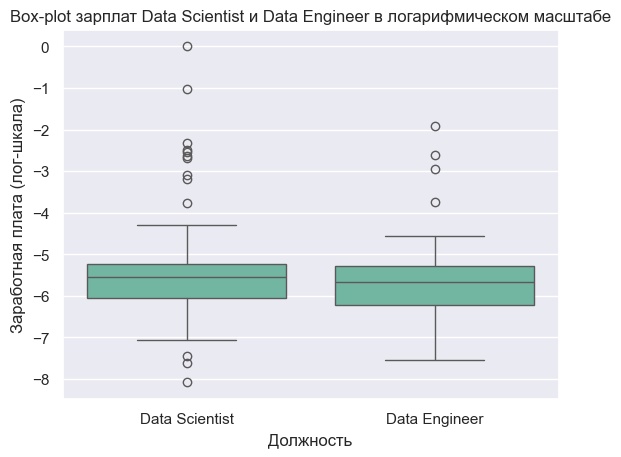

In [23]:
import numpy as np 
filtered_data = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
# Применяем логарифмическое преобразование к зарплате и сохраняем в отдельный столбец
filtered_data['log_Salary'] = np.log(filtered_data['R_salary_scaled'])

# Рисуем box-plot по логарифмированной зарплате
sns.boxplot(x="job_title", y="log_Salary", data=filtered_data)

# Оформляем график
plt.xlabel("Должность")
plt.ylabel("Заработная плата (лог-шкала)")
plt.title("Box-plot зарплат Data Scientist и Data Engineer в логарифмическом масштабе")
plt.show()


Вывод DE в среднем получают больше чем DS, но DS  чаще претендуют на большие ЗП

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП Data Scientist ($μ_1$) статистически равен компаниям различных размеров ($μ_2$).

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): ЗП Data Scientist ($μ_1$) статистически не равен компаниям различных размеров ($μ_2$).

$$ H_1 : μ_1 != μ_2$$

**Выберем подходящий статистический тест**
* Какой тип у признака ? — Количесвтенный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.
* Параметрические или не параметрические - не параметрические

In [24]:
data_c = data.groupby(['company_size', 'salary']).size().reset_index(name='count')

data_ca = data_c[data_c['company_size'] == 'L']['salary']
data_cb = data_c[data_c['company_size'] == 'M']['salary']
data_cc = data_c[data_c['company_size'] == 'S']['salary']

statistic_0, p_value_0 = levene(data_ca, data_cb, data_cc)

# Вывод результатов
print(f"Статистика теста Левене: {statistic_0:.4f}")
print(f"P-значение: {p_value_0:.4f}")
print(decision_normality(p_value_0))
print(decision_hypothesis(p_value_0))


statistic, p_value_1 = stats.kruskal(data_ca, data_cb, data_cc)
# Вывод результатов
print(f"Статистика теста Краскела - Уоллиса: {statistic:.4f}")
print(f"P-значение: {p_value_1:.4f}")
print(decision_normality(p_value_1))
print(decision_hypothesis(p_value_1))

Статистика теста Левене: 3.8224
P-значение: 0.0228
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
None
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
None
Статистика теста Краскела - Уоллиса: 3.6966
P-значение: 0.1575
p-value = 0.158
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
None
p-value = 0.158
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
None


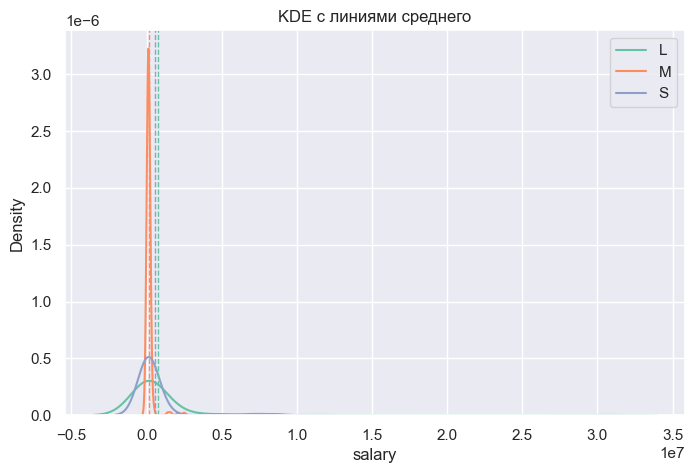

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean_ca = np.mean(data_ca)
mean_cb = np.mean(data_cb)
mean_cc = np.mean(data_cc)

plt.figure(figsize=(8,5))
sns.kdeplot(data_ca, label='L')
sns.kdeplot(data_cb, label='M')
sns.kdeplot(data_cc, label='S')

# горизонтальные линии на уровне плотности не нужны — рисуем вертикальные линии на значении средней зарплаты
plt.axvline(mean_ca, color='C0', linestyle='--', linewidth=1)
plt.axvline(mean_cb, color='C1', linestyle='--', linewidth=1)
plt.axvline(mean_cc, color='C2', linestyle='--', linewidth=1)

plt.legend()
plt.xlabel('salary')
plt.title('KDE с линиями среднего')
plt.show()


Так как данные не параметрические, используем Критериий Краскела - уоллиса, данные равнозначны.

salary        4000      13400     19000     21600     30000     31000     \
company_size                                                               
L                    0         1         0         0         0         1   
M                    1         0         0         0         1         0   
S                    0         0         1         1         0         0   

salary        32000     34000     35000     37000     ...  700000    1250000   \
company_size                                          ...                       
L                    1         0         0         0  ...         0         0   
M                    0         1         2         0  ...         0         0   
S                    0         0         0         1  ...         1         1   

salary        1400000   2100000   2200000   2400000   2500000   3000000   \
company_size                                                               
L                    0         0         1         1         

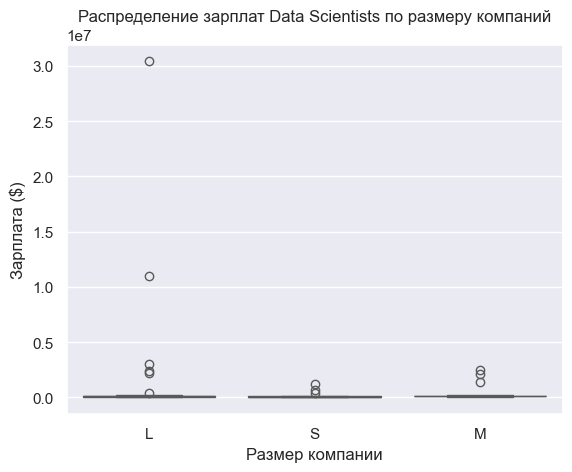

In [26]:

# Фильтрация строк с сотрудниками Data Scientist
ds_data = data.query("job_title == 'Data Scientist'")

# Создание таблицы сопряжённости (распределение зарплат по размеру компаний)
cross_tab = pd.crosstab(ds_data['company_size'], ds_data['salary'])
print(cross_tab)
# Визуализация распределения зарплат с использованием boxplot (ящик с усами)
sns.boxplot(data=ds_data, x="company_size", y="salary")
plt.xlabel("Размер компании")
plt.ylabel("Зарплата ($)")
plt.title("Распределение зарплат Data Scientists по размеру компаний")
plt.show()

Свидетельствует о единичных выбросах с высокой ЗП у крупных компаний - L, что может говорить о наличии в компании индивидуальности заработка на основе процентного предоставления дохода от частоты использования кода(сайты, преложения, игры) или же занимаемость должности(директория, владалец), которая предоставляет высокий доход. В других видах компаний также наблюдается средний доход в районе 0,3 квантили, но число выбросов значительно ниже. 

Узнаем в какого размера компаний числятся сотрудники по разным направлениям.

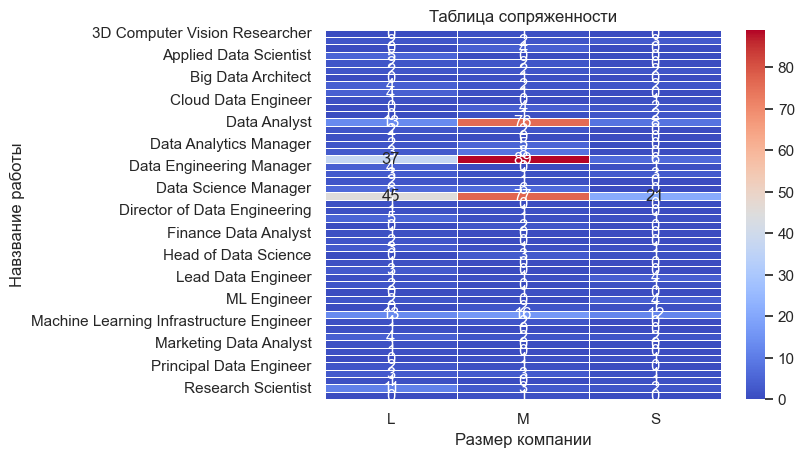

In [27]:
cross_tab = pd.crosstab(index=data['job_title'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Навзвание работы')
plt.title('Таблица сопряженности')
plt.show()

Вывод: в M - Средняя компания насчитывается самое большое кол-во работников разных компаний. Лидирует по кол-во "Data Engeneering Manager" 


Предположение: Распределив данные по размеру компании, я могу узнать количества трудоустроенных пользователь на Высокую ЗП. В зависимости от количества сотрудников разных компаний, я сделаю вывод о восстребованности направлений, а также о ЗП основанных на ключевых рахмерах 'L','M','S'.

In [36]:
from scipy.stats import f_oneway

# Разделение зарплат по группам размеров компаний
grouped_data = [data.query(f'company_size == "{size}"')['salary'] for size in data['company_size'].unique()]
print(grouped_data)
# Тест ANOVA
statistic, p_value = f_oneway(*grouped_data)
print(f"Статистика F-тест: {statistic}, p-значение: {p_value}")
print(f"Статистика теста Краскела - Уоллиса: {statistic:.4f}")
print(f"P-значение: {p_value:.4f}")
print(decision_normality(p_value))
print(decision_hypothesis(p_value))

[0         70000
4        150000
5         72000
7      11000000
8        135000
         ...   
524      135000
525      177000
550      205300
551      140400
606      200000
Name: salary, Length: 198, dtype: int64, 1      260000
3       20000
6      190000
9      125000
10      45000
        ...  
510    150000
512     65000
513     65000
515     48000
522     20000
Name: salary, Length: 83, dtype: int64, 2       85000
12      35000
18     423000
19      56000
20     299000
        ...  
601     52000
602    154000
603    126000
604    129000
605    150000
Name: salary, Length: 326, dtype: int64]
Статистика F-тест: 5.296083945595397, p-значение: 0.005246563997973165
Статистика теста Краскела - Уоллиса: 5.2961
P-значение: 0.0052
p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
None
p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
None


Проверка для реализации Глубокого обучения, для получения закономерностей в данных

Корреляция между профессией и зарплатой (Spearman): rho=0.072, p-value=0.076
Корреляция между размером компании и зарплатой (Spearman): rho=-0.039, p-value=0.342
Кендалл коэффициент между профессией и зарплатой: tau=0.050, p-value=0.082
Кендалл коэффициент между размером компании и зарплатой: tau=-0.027, p-value=0.396


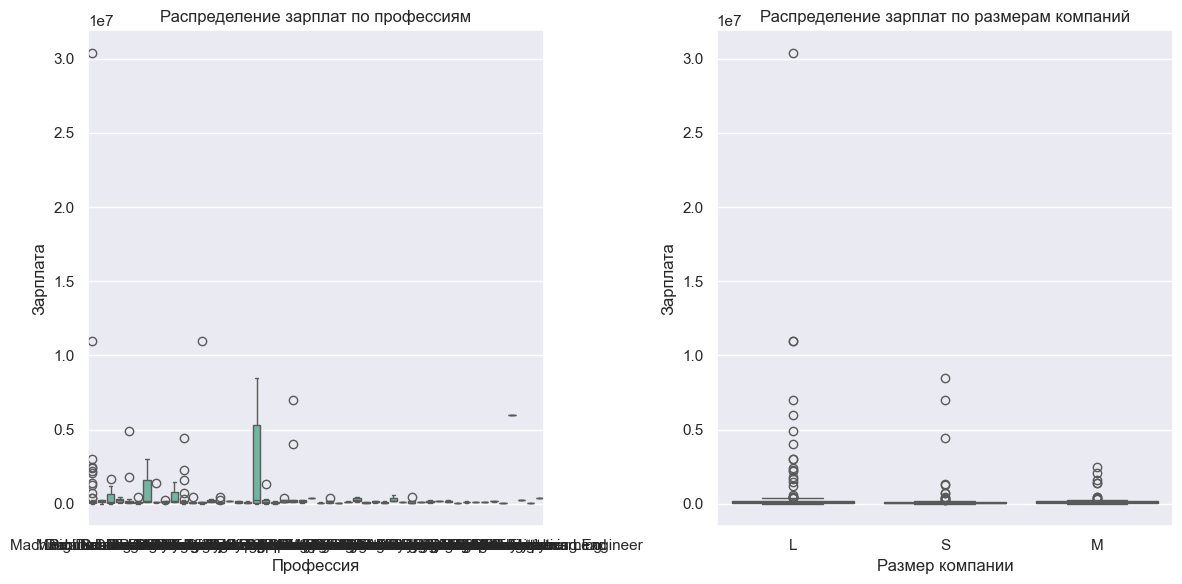

R^2 score: 0.006


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau



# Удалим строки с пустыми значениями
data.dropna(inplace=True)

# Добавляем порядковые индексы для categorical признаков
data['job_title_code'] = pd.factorize(data['job_title'])[0]
data['company_size_code'] = pd.factorize(data['company_size'])[0]



rho_job_salary, pval_job_salary = spearmanr(data['job_title_code'], data['salary'])
rho_company_salary, pval_company_salary = spearmanr(data['company_size_code'], data['salary'])

print(f"Корреляция между профессией и зарплатой (Spearman): rho={rho_job_salary:.3f}, p-value={pval_job_salary:.3f}")
print(f"Корреляция между размером компании и зарплатой (Spearman): rho={rho_company_salary:.3f}, p-value={pval_company_salary:.3f}")

tau_job_salary, pval_tau_job_salary = kendalltau(data['job_title_code'], data['salary'])
tau_company_salary, pval_tau_company_salary = kendalltau(data['company_size_code'], data['salary'])

print(f"Кендалл коэффициент между профессией и зарплатой: tau={tau_job_salary:.3f}, p-value={pval_tau_job_salary:.3f}")
print(f"Кендалл коэффициент между размером компании и зарплатой: tau={tau_company_salary:.3f}, p-value={pval_tau_company_salary:.3f}")

plt.figure(figsize=(12, 6))

# Boxplots по профессиям
plt.subplot(1, 2, 1)
sns.boxplot(x='job_title', y='salary', data=data)
plt.title('Распределение зарплат по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Зарплата')

# Boxplots по размерам компаний
plt.subplot(1, 2, 2)
sns.boxplot(x='company_size', y='salary', data=data)
plt.title('Распределение зарплат по размерам компаний')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['job_title_code', 'company_size_code']]
y = data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"R^2 score: {score:.3f}")


alpha=0.05 
Корреляция между профессией и зарплатой (Spearman)
 - Коэффициент Спирмана ($ \rho = 0.072 $, p-value = 0.076):
     - Значение близко к нулю, что означает слабую положительную связь между профессией и уровнем зарплаты.
Корреляция между размером компании и зарплатой (Spearman)
Коэффициент Спирмана ($ \rho = -0.039 $, p-value = 0.342):
     - Очень слабая отрицательная связь между размером компании и уровнем зарплаты.
Коэффициент Кендалла подтверждает выводы, полученные методом Спирмана: 
 - Между профессией и зарплатой слабый положительный тренд ($ \tau = 0.050 $, p-value = 0.082), близкий к уровню значимости.
   - Между размером компании и зарплатой снова наблюдается крайне низкая обратная связь ($ \tau = -0.027 $, p-value = 0.396), которая не имеет статистической значимости.
Значение 𝑅² равное 0.006, свидетельствует о чрезвычайно низкой способности модели объяснить изменение зависимой переменной (зарплаты) на основании двух рассматриваемых факторов: профессии (job_title) и размера компании (company_size).

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП Data Scientist ($μ_1$) статистически равен компаниям различных размеров ($μ_2$).

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): ЗП Data Scientist ($μ_1$) статистически не равен компаниям различных размеров ($μ_2$).

$$ H_1 : μ_1 != μ_2$$

**Выберем подходящий статистический тест**
* Какой тип у признака ? — Количесвтенный.
* Сколько сравниваемых групп? — более двух.
* Проверяется независимость групп? — Да.
* Параметрические или не параметрические - не параметрические

In [44]:
data_1 = data['job_title'].isin(['Data Scientist', 'Data Engineer'])
filtered_data = data[data_1]
cross_tab = pd.crosstab(filtered_data['job_title'], filtered_data['company_size'])
print(cross_tab)

company_size     L   M   S
job_title                 
Data Engineer   37  89   6
Data Scientist  45  77  21


In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

# Подготавливаем данные и получаем таблицу


# Фильтруем только интересующие нас позиции
data_1 = data['job_title'].isin(['Data Scientist', 'Data Engineer'])
filtered_data = data[data_1]

# Получаем таблицу сопряженности
cross_tab = pd.crosstab(filtered_data['job_title'], filtered_data['company_size'])

# Выведем таблицу для наглядности
print("Cross Tabulation Table:")
print(cross_tab)

# Применение теста хи-квадрат
chi2, p_value, dof, expctd = chi2_contingency(cross_tab)

# Результаты теста
print("\\nChi-Squared Test Results:")
print(f"Хи-квадрат стат.: {chi2:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Степень свободы: {dof}")
print(decision_normality(p_value))
print(decision_hypothesis(p_value))


Cross Tabulation Table:
company_size     L   M   S
job_title                 
Data Engineer   37  89   6
Data Scientist  45  77  21
\nChi-Squared Test Results:
Хи-квадрат стат.: 9.5566
p-значение: 0.0084
Степень свободы: 2
p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
None
p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
None
